Name:Dhyan Navneeth V
Class:S6 ECE
Roll no:25


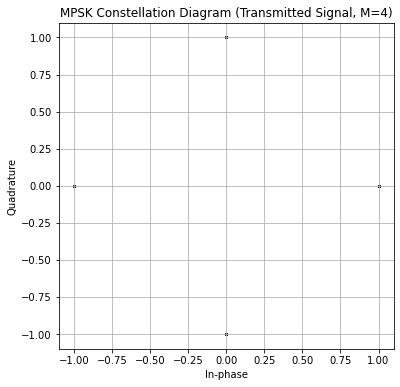

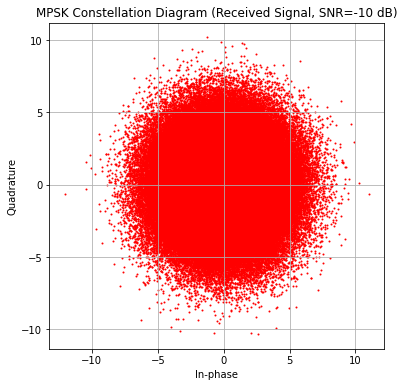

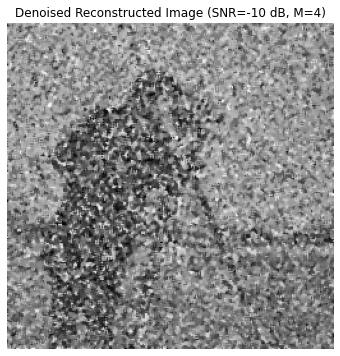

SNR: -10 dB, Bit Error Rate (BER) for M=4: 0.42328643798828125


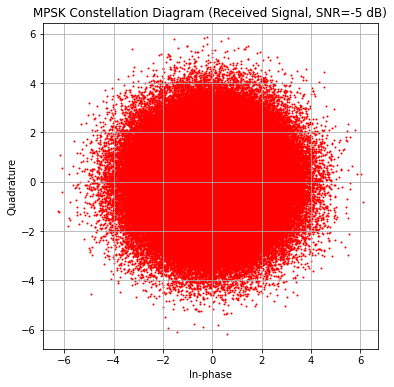

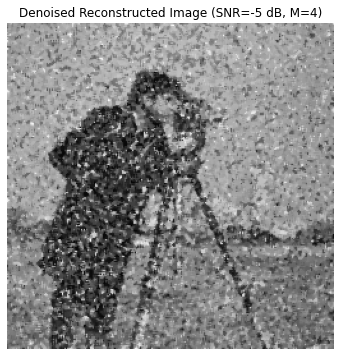

SNR: -5 dB, Bit Error Rate (BER) for M=4: 0.34848976135253906


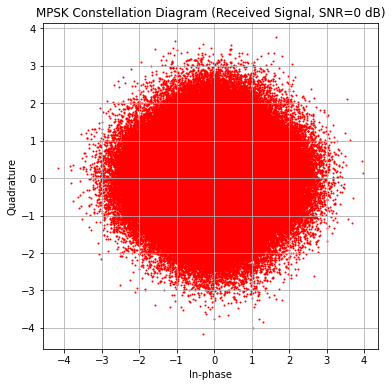

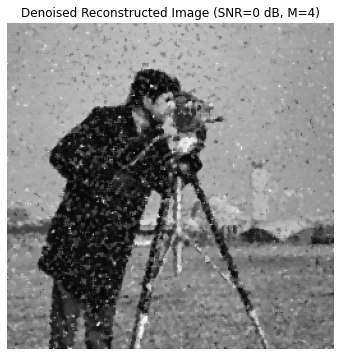

SNR: 0 dB, Bit Error Rate (BER) for M=4: 0.21350479125976562


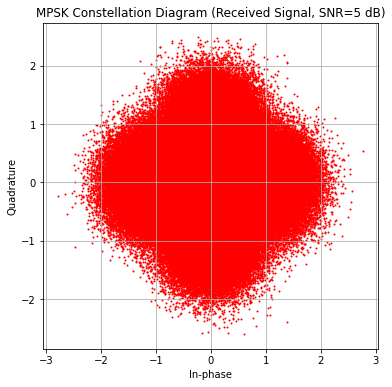

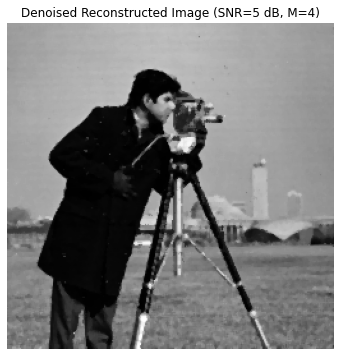

SNR: 5 dB, Bit Error Rate (BER) for M=4: 0.0545806884765625


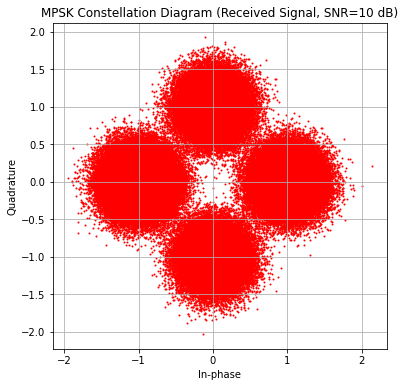

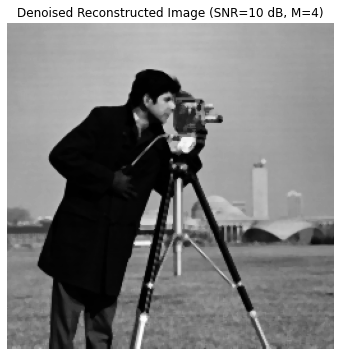

SNR: 10 dB, Bit Error Rate (BER) for M=4: 0.00118255615234375


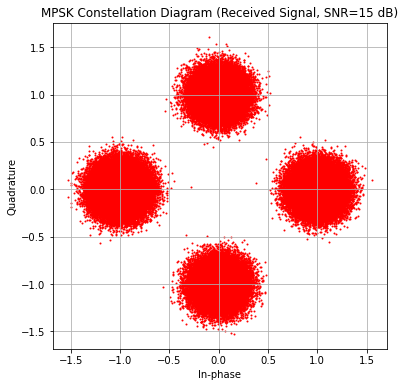

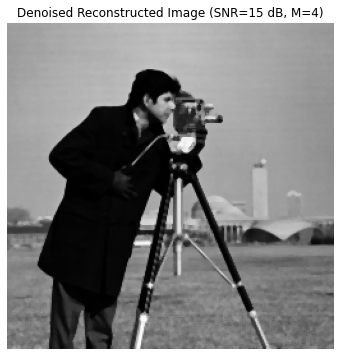

SNR: 15 dB, Bit Error Rate (BER) for M=4: 0.0


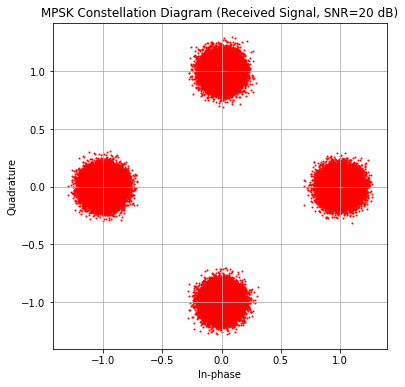

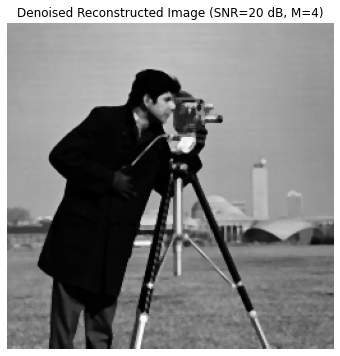

SNR: 20 dB, Bit Error Rate (BER) for M=4: 0.0


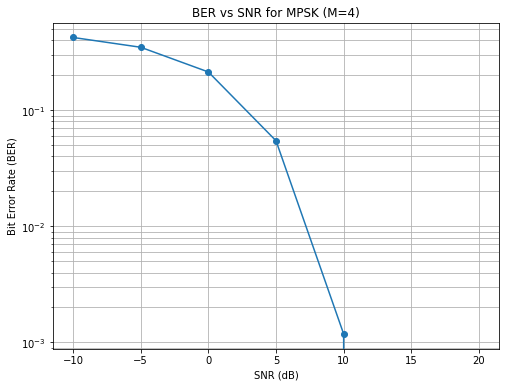

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
print("Name:Dhyan Navneeth V")
print("Class:S6 ECE")
print("Roll no:25")


# ---------------------- Load Image from Fixed Location ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Error: Image not found at {image_path}")

rows, cols = image.shape

# ---------------------- Convert Image to Binary ----------------------
image_1d = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_1d])

# ---------------------- MPSK Modulation ----------------------
M = 4  # Change M to 2, 4, 8 as needed
symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)
k = int(np.log2(M))

# Ensure bit length is a multiple of k
padding_length = (k - len(image_binary) % k) % k
image_binary += "0" * padding_length

# Group bits into k-bit segments
bit_groups = [image_binary[i:i+k] for i in range(0, len(image_binary), k)]
modulated_symbols = np.array([symbols[int(bits, 2)] for bits in bit_groups])

# Plot the constellation diagram of the transmitted MPSK signal
plt.figure(figsize=(6, 6))
plt.scatter(modulated_symbols.real, modulated_symbols.imag, marker='o', color='b', s=1)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title(f"MPSK Constellation Diagram (Transmitted Signal, M={M})")
plt.grid()
plt.show()

# ---------------------- Define SNR Range and Initialize BER List ----------------------
snr_values = np.arange(-10, 21, 5)
ber_values = []

# ---------------------- Transmission Through AWGN Channel ----------------------
for snr_db in snr_values:
    snr_linear = 10 ** (snr_db / 10)
    noise_variance = 1 / (2 * snr_linear)
    noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
    received_signal = modulated_symbols + noise

    # Plot the constellation diagram of the received signal
    plt.figure(figsize=(6, 6))
    plt.scatter(received_signal.real, received_signal.imag, marker='o', color='r', s=1)
    plt.xlabel("In-phase")
    plt.ylabel("Quadrature")
    plt.title(f"MPSK Constellation Diagram (Received Signal, SNR={snr_db} dB)")
    plt.grid()
    plt.show()
    
    # ---------------------- MPSK Demodulation ----------------------
    detected_indices = np.argmin(np.abs(received_signal[:, None] - symbols[None, :]), axis=1)
    decoded_bits = "".join([format(index, f'0{k}b') for index in detected_indices])
    
    # Ensure decoded bits length matches original length
    decoded_bits = decoded_bits[:len(image_binary)]
    
    # Convert back to pixel values
    decoded_binary_values = [decoded_bits[i:i+8] for i in range(0, len(decoded_bits), 8)]
    decoded_pixel_values = np.array([int(b, 2) for b in decoded_binary_values if len(b) == 8], dtype=np.uint8)
    
    # Reshape back to original image dimensions
    decoded_image = decoded_pixel_values.reshape(rows, cols)
    
    # Apply median filter for noise reduction
    denoised_image = median_filter(decoded_image, size=3)
    
    # Show the denoised reconstructed image at different SNR values
    plt.figure(figsize=(6,6))
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f"Denoised Reconstructed Image (SNR={snr_db} dB, M={M})")
    plt.axis("off")
    plt.show()
    
    # ---------------------- Compute BER ----------------------
    num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
    bit_error_rate = num_bit_errors / len(image_binary)
    ber_values.append(bit_error_rate)
    
    print(f"SNR: {snr_db} dB, Bit Error Rate (BER) for M={M}: {bit_error_rate}")

# ---------------------- Plot BER vs SNR ----------------------
plt.figure(figsize=(8, 6))
plt.semilogy(snr_values, ber_values, marker='o', linestyle='-')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title(f"BER vs SNR for MPSK (M={M})")
plt.grid(True, which='both')
plt.show()

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import os

print("Name: Dhyan Navneeth V")
print("Class: S6 ECE")
print("Roll no: 25")

# ---------------------- Load Image from Fixed Location ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png" 
save_dir = "G:\My Drive\KTU\S6\Comm LAB\plots"  # Change this to your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Error: Image not found at {image_path}")

rows, cols = image.shape

# ---------------------- Convert Image to Binary ----------------------
image_1d = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_1d])

# ---------------------- MPSK Modulation ----------------------
M = 4  # Change M to 2, 4, 8 as needed
symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)
k = int(np.log2(M))

# Ensure bit length is a multiple of k
padding_length = (k - len(image_binary) % k) % k
image_binary += "0" * padding_length

# Group bits into k-bit segments
bit_groups = [image_binary[i:i+k] for i in range(0, len(image_binary), k)]
modulated_symbols = np.array([symbols[int(bits, 2)] for bits in bit_groups])

# Plot and save the constellation diagram of the transmitted MPSK signal
plt.figure(figsize=(6, 6))
plt.scatter(modulated_symbols.real, modulated_symbols.imag, marker='o', color='b', s=1)
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.title(f"MPSK Constellation Diagram (Transmitted Signal, M={M})")
plt.grid()
plt.savefig(os.path.join(save_dir, "transmitted_constellation.png"))
plt.close()

# ---------------------- Define SNR Range and Initialize BER List ----------------------
snr_values = np.arange(-10, 21, 5)
ber_values = []

# ---------------------- Transmission Through AWGN Channel ----------------------
for snr_db in snr_values:
    snr_linear = 10 ** (snr_db / 10)
    noise_variance = 1 / (2 * snr_linear)
    noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
    received_signal = modulated_symbols + noise

    # Plot and save the constellation diagram of the received signal
    plt.figure(figsize=(6, 6))
    plt.scatter(received_signal.real, received_signal.imag, marker='o', color='r', s=1)
    plt.xlabel("In-phase")
    plt.ylabel("Quadrature")
    plt.title(f"MPSK Constellation Diagram (Received Signal, SNR={snr_db} dB)")
    plt.grid()
    plt.savefig(os.path.join(save_dir, f"received_constellation_snr_{snr_db}.png"))
    plt.close()
    
    # ---------------------- MPSK Demodulation ----------------------
    detected_indices = np.argmin(np.abs(received_signal[:, None] - symbols[None, :]), axis=1)
    decoded_bits = "".join([format(index, f'0{k}b') for index in detected_indices])
    
    # Ensure decoded bits length matches original length
    decoded_bits = decoded_bits[:len(image_binary)]
    
    # Convert back to pixel values
    decoded_binary_values = [decoded_bits[i:i+8] for i in range(0, len(decoded_bits), 8)]
    decoded_pixel_values = np.array([int(b, 2) for b in decoded_binary_values if len(b) == 8], dtype=np.uint8)
    
    # Reshape back to original image dimensions
    decoded_image = decoded_pixel_values.reshape(rows, cols)
    
    # Apply median filter for noise reduction
    denoised_image = median_filter(decoded_image, size=3)
    
    # Save the denoised reconstructed image at different SNR values
    plt.figure(figsize=(6,6))
    plt.imshow(denoised_image, cmap='gray')
    plt.title(f"Denoised Reconstructed Image (SNR={snr_db} dB, M={M})")
    plt.axis("off")
    plt.savefig(os.path.join(save_dir, f"denoised_image_snr_{snr_db}.png"))
    plt.close()
    
    # ---------------------- Compute BER ----------------------
    num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
    bit_error_rate = num_bit_errors / len(image_binary)
    ber_values.append(bit_error_rate)
    
    print(f"SNR: {snr_db} dB, Bit Error Rate (BER) for M={M}: {bit_error_rate}")

# ---------------------- Plot and Save BER vs SNR ----------------------
plt.figure(figsize=(8, 6))
plt.semilogy(snr_values, ber_values, marker='o', linestyle='-')
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate (BER)")
plt.title(f"BER vs SNR for MPSK (M={M})")
plt.grid(True, which='both')
plt.savefig(os.path.join(save_dir, "ber_vs_snr.png"))
plt.close()


Name: Dhyan Navneeth V
Class: S6 ECE
Roll no: 25
SNR: -10 dB, Bit Error Rate (BER) for M=4: 0.42226409912109375
SNR: -5 dB, Bit Error Rate (BER) for M=4: 0.3496055603027344
SNR: 0 dB, Bit Error Rate (BER) for M=4: 0.2129993438720703
SNR: 5 dB, Bit Error Rate (BER) for M=4: 0.055606842041015625
SNR: 10 dB, Bit Error Rate (BER) for M=4: 0.0012378692626953125
SNR: 15 dB, Bit Error Rate (BER) for M=4: 0.0
SNR: 20 dB, Bit Error Rate (BER) for M=4: 0.0


Name: Dhyan Navneeth V
Class: S6 ECE
Roll no: 25


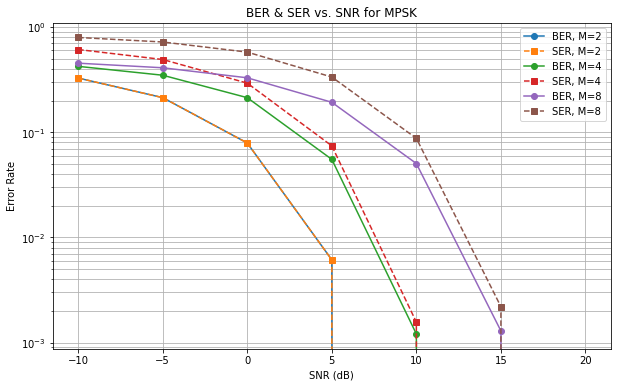

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

print("Name: Dhyan Navneeth V")
print("Class: S6 ECE")
print("Roll no: 25")


# ---------------------- Load Image from Fixed Location ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png"  # Update if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Error: Image not found at {image_path}")

rows, cols = image.shape

# ---------------------- Convert Image to Binary ----------------------
image_1d = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_1d])

# ---------------------- MPSK Simulation for M = 2, 4, 8 ----------------------
M_values = [2, 4, 8]  # BPSK, QPSK, 8-PSK
snr_values = np.arange(-10, 21, 5)

plt.figure(figsize=(10, 6))

for M in M_values:
    k = int(np.log2(M))  # Bits per symbol
    symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)  # MPSK constellation

    # Ensure bit length is a multiple of k
    padding_length = (k - len(image_binary) % k) % k
    image_binary = image_binary.ljust(len(image_binary) + padding_length, "0")  

    # Group bits into k-bit segments
    bit_groups = [image_binary[i:i+k] for i in range(0, len(image_binary), k)]
    bit_groups = list(map(str, bit_groups))  # Ensure they are strings

    # Convert bit groups to symbol indices
    modulated_symbols = np.array([symbols[int(b, 2)] for b in bit_groups])

    ber_values = []
    ser_values = []

    for snr_db in snr_values:
        snr_linear = 10 ** (snr_db / 10)
        noise_variance = 1 / (2 * snr_linear)
        noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
        received_signal = modulated_symbols + noise

        # MPSK Demodulation
        detected_indices = np.argmin(np.abs(received_signal[:, None] - symbols[None, :]), axis=1)
        decoded_bits = "".join([format(index, f'0{k}b') for index in detected_indices])

        # Ensure decoded bits length matches original length
        decoded_bits = decoded_bits[:len(image_binary)]
        
        # Convert back to pixel values
        decoded_binary_values = [decoded_bits[i:i+8] for i in range(0, len(decoded_bits), 8)]
        decoded_pixel_values = np.array([int(b, 2) for b in decoded_binary_values if len(b) == 8], dtype=np.uint8)

        # Reshape back to original image dimensions
        decoded_image = decoded_pixel_values.reshape(rows, cols)

        # Apply median filter for noise reduction
        denoised_image = median_filter(decoded_image, size=3)

        # Compute BER and SER
        num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
        bit_error_rate = num_bit_errors / len(image_binary)
        ber_values.append(bit_error_rate)

        num_symbol_errors = np.sum(detected_indices != np.array([int(b, 2) for b in bit_groups]))
        symbol_error_rate = num_symbol_errors / len(detected_indices)
        ser_values.append(symbol_error_rate)

    # ---------------------- Plot BER vs SNR ----------------------
    plt.semilogy(snr_values, ber_values, marker='o', linestyle='-', label=f'BER, M={M}')
    plt.semilogy(snr_values, ser_values, marker='s', linestyle='--', label=f'SER, M={M}')

# ---------------------- Final Plot Formatting ----------------------
plt.xlabel("SNR (dB)")
plt.ylabel("Error Rate")
plt.title("BER & SER vs. SNR for MPSK")
plt.legend()
plt.grid(True, which='both')
plt.show()

Name: Dhyan Navneeth V
Class: S6 ECE
Roll no: 25


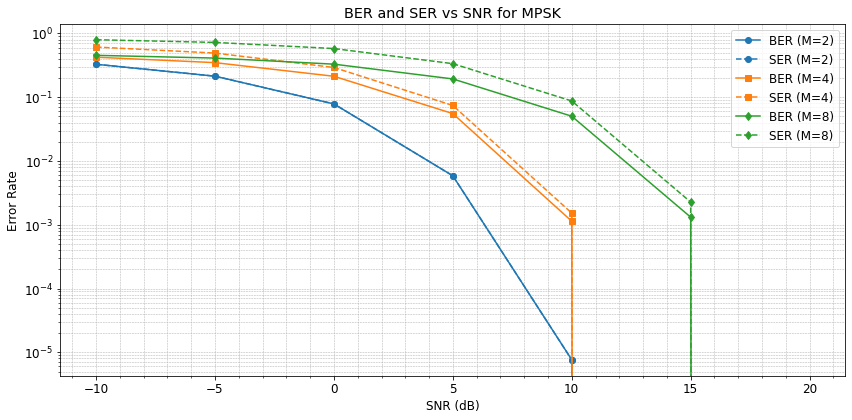

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

print("Name: Dhyan Navneeth V")
print("Class: S6 ECE")
print("Roll no: 25")

# ---------------------- Load Image ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

rows, cols = image.shape
image_flat = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_flat])

# ---------------------- MPSK Parameters ----------------------
M_values = [2, 4, 8]  # BPSK, QPSK, 8-PSK
snr_values = np.arange(-10, 21, 5)

# ---------------------- Prepare Plot ----------------------
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})

# ---------------------- Colors & Markers ----------------------
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', 'd']

# ---------------------- Main Simulation ----------------------
for idx, M in enumerate(M_values):
    k = int(np.log2(M))
    symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)

    # Padding bits
    padding = (k - len(image_binary) % k) % k
    padded_binary = image_binary.ljust(len(image_binary) + padding, '0')

    # Group bits into symbols
    bit_groups = [padded_binary[i:i + k] for i in range(0, len(padded_binary), k)]
    symbol_indices = np.array([int(b, 2) for b in bit_groups])
    modulated_symbols = symbols[symbol_indices]

    ber_values = []
    ser_values = []

    for snr_db in snr_values:
        snr_linear = 10 ** (snr_db / 10)
        noise_variance = 1 / (2 * snr_linear)
        noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
        received = modulated_symbols + noise

        # Demodulation
        detected_indices = np.argmin(np.abs(received[:, None] - symbols[None, :]), axis=1)
        decoded_bits = "".join([format(i, f'0{k}b') for i in detected_indices])
        decoded_bits = decoded_bits[:len(image_binary)]  # Clip excess bits

        # Image Reconstruction
        recovered_binary = [decoded_bits[i:i + 8] for i in range(0, len(decoded_bits), 8)]
        recovered_pixels = np.array([int(b, 2) for b in recovered_binary if len(b) == 8], dtype=np.uint8)
        recovered_image = recovered_pixels.reshape(rows, cols)
        recovered_image = median_filter(recovered_image, size=3)

        # BER & SER Calculation
        num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
        ber = num_bit_errors / len(image_binary)
        ber_values.append(ber)

        num_symbol_errors = np.sum(symbol_indices != detected_indices)
        ser = num_symbol_errors / len(symbol_indices)
        ser_values.append(ser)

    # ---------------------- Plotting ----------------------
    plt.semilogy(snr_values, ber_values, marker=markers[idx], linestyle='-', color=colors[idx], label=f'BER (M={M})')
    plt.semilogy(snr_values, ser_values, marker=markers[idx], linestyle='--', color=colors[idx], label=f'SER (M={M})')

# ---------------------- Finishing Touches ----------------------
plt.xlabel("SNR (dB)")
plt.ylabel("Error Rate")
plt.title("BER and SER vs SNR for MPSK")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()


Name: Dhyan Navneeth V
Class: S6 ECE
Roll no: 25
Plot saved successfully at: G:\My Drive\KTU\S6\Comm LAB\MPSK plots\BER_SER_vs_SNR_MPSK.png


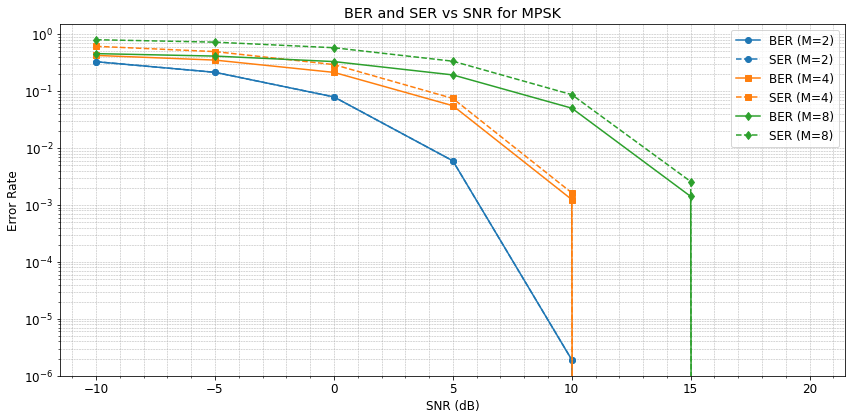

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import os

print("Name: Dhyan Navneeth V")
print("Class: S6 ECE")
print("Roll no: 25")

# ---------------------- Load Image ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

rows, cols = image.shape
image_flat = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_flat])

# ---------------------- MPSK Parameters ----------------------
M_values = [2, 4, 8]  # BPSK, QPSK, 8-PSK
snr_values = np.arange(-10, 21, 5)

# ---------------------- Prepare Plot ----------------------
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 12})

# ---------------------- Colors & Markers ----------------------
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', 'd']

# ---------------------- Main Simulation ----------------------
for idx, M in enumerate(M_values):
    k = int(np.log2(M))
    symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)

    # Padding bits
    padding = (k - len(image_binary) % k) % k
    padded_binary = image_binary.ljust(len(image_binary) + padding, '0')

    # Group bits into symbols
    bit_groups = [padded_binary[i:i + k] for i in range(0, len(padded_binary), k)]
    symbol_indices = np.array([int(b, 2) for b in bit_groups])
    modulated_symbols = symbols[symbol_indices]

    ber_values = []
    ser_values = []

    for snr_db in snr_values:
        snr_linear = 10 ** (snr_db / 10)
        noise_variance = 1 / (2 * snr_linear)
        noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
        received = modulated_symbols + noise

        # Demodulation
        detected_indices = np.argmin(np.abs(received[:, None] - symbols[None, :]), axis=1)
        decoded_bits = "".join([format(i, f'0{k}b') for i in detected_indices])
        decoded_bits = decoded_bits[:len(image_binary)]  # Clip excess bits

        # Image Reconstruction
        recovered_binary = [decoded_bits[i:i + 8] for i in range(0, len(decoded_bits), 8)]
        recovered_pixels = np.array([int(b, 2) for b in recovered_binary if len(b) == 8], dtype=np.uint8)
        recovered_image = recovered_pixels.reshape(rows, cols)
        recovered_image = median_filter(recovered_image, size=3)

        # BER & SER Calculation
        num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
        ber = num_bit_errors / len(image_binary)
        ber_values.append(ber)

        num_symbol_errors = np.sum(symbol_indices != detected_indices)
        ser = num_symbol_errors / len(symbol_indices)
        ser_values.append(ser)

    # ---------------------- Plotting ----------------------
    plt.semilogy(snr_values, ber_values, marker=markers[idx], linestyle='-', color=colors[idx], label=f'BER (M={M})')
    plt.semilogy(snr_values, ser_values, marker=markers[idx], linestyle='--', color=colors[idx], label=f'SER (M={M})')

# ---------------------- Finishing Touches ----------------------
plt.xlabel("SNR (dB)")
plt.ylabel("Error Rate")
plt.title("BER and SER vs SNR for MPSK")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()

# ---------------------- Save Plot ----------------------
save_dir = r"G:\My Drive\KTU\S6\Comm LAB\MPSK plots"
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
save_path = os.path.join(save_dir, "BER_SER_vs_SNR_MPSK.png")
plt.savefig(save_path, dpi=300)
print(f"Plot saved successfully at: {save_path}")

# ---------------------- Show Plot ----------------------
plt.show()


Name: Dhyan Navneeth V
Class: S6 ECE
Roll no: 25


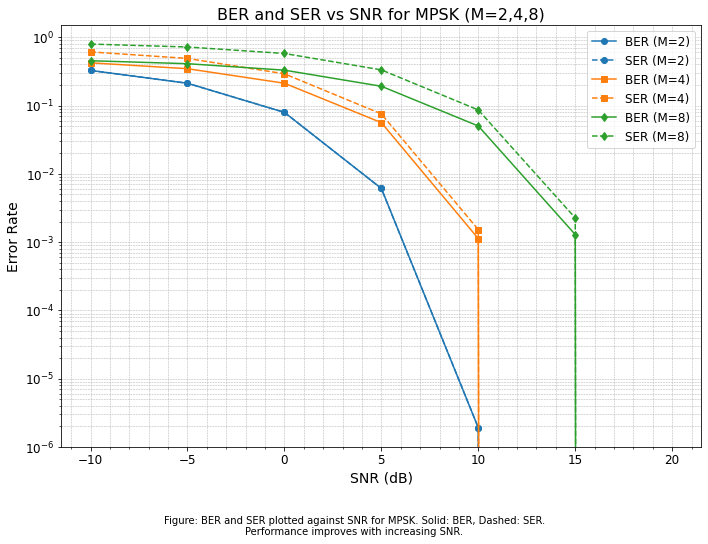

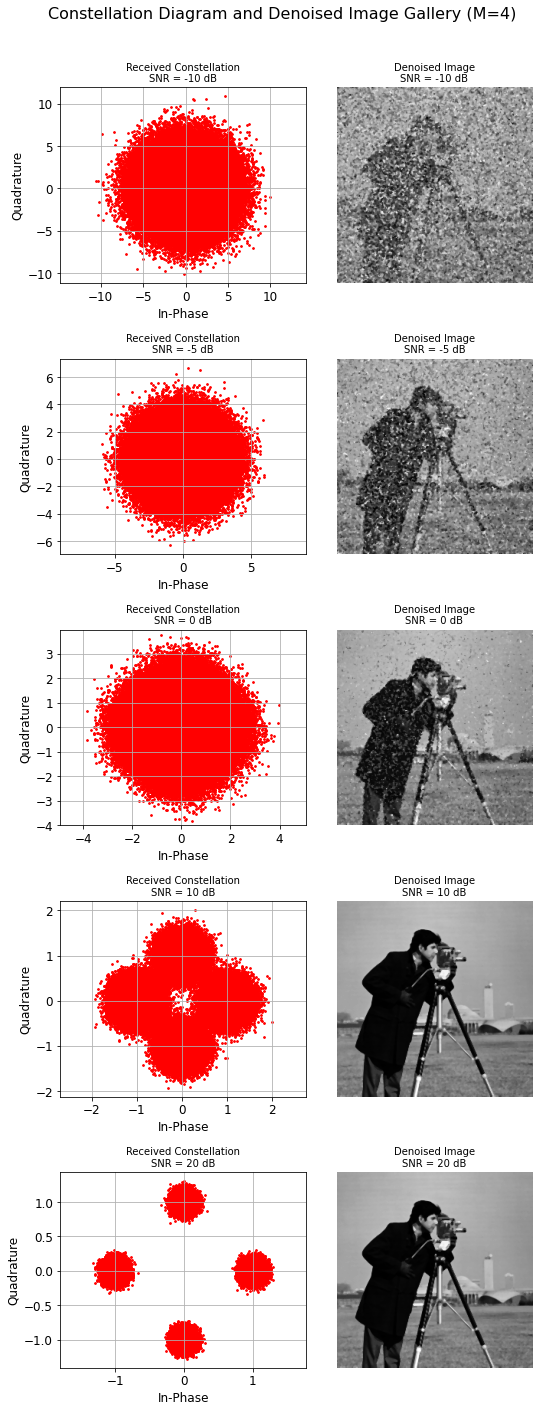

✅ All plots and galleries saved successfully!


In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
import os

print("Name: Dhyan Navneeth V")
print("Class: S6 ECE")
print("Roll no: 25")

# ---------------------- Load Image ----------------------
image_path = r"G:\My Drive\KTU\S6\Comm LAB\cameraman.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

rows, cols = image.shape
image_flat = image.flatten()
image_binary = "".join([format(pixel, '08b') for pixel in image_flat])

# ---------------------- MPSK Parameters ----------------------
M_values = [2, 4, 8]  # BPSK, QPSK, 8-PSK
snr_values = np.arange(-10, 21, 5)
snr_showcase = [-10, -5, 0, 10, 20]

# ---------------------- Output Directory ----------------------
save_dir = r"G:\My Drive\KTU\S6\Comm LAB\MPSK plots"
os.makedirs(save_dir, exist_ok=True)

# ---------------------- Colors & Markers ----------------------
colors = ['tab:blue', 'tab:orange', 'tab:green']
markers = ['o', 's', 'd']

# ---------- Containers ----------
ber_values_list = []
ser_values_list = []
constellations_gallery = []
images_gallery = []
titles_gallery = []

# ---------------------- Main Simulation ----------------------
for idx, M in enumerate(M_values):
    k = int(np.log2(M))
    symbols = np.exp(1j * 2 * np.pi * np.arange(M) / M)

    # Padding bits
    padding = (k - len(image_binary) % k) % k
    padded_binary = image_binary.ljust(len(image_binary) + padding, '0')

    # Group bits into symbols
    bit_groups = [padded_binary[i:i + k] for i in range(0, len(padded_binary), k)]
    symbol_indices = np.array([int(b, 2) for b in bit_groups])
    modulated_symbols = symbols[symbol_indices]

    # --------- Transmitted Constellation Diagram ---------
    if M == 4:
        plt.figure(figsize=(6,6))
        plt.scatter(modulated_symbols.real, modulated_symbols.imag, color='blue', s=1)
        plt.title("Transmitted Constellation (M=4)")
        plt.xlabel("In-Phase")
        plt.ylabel("Quadrature")
        plt.grid(True)
        plt.axis('equal')
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, "Transmitted_Constellation_M4.png"), dpi=300)
        plt.close()

    ber_values = []
    ser_values = []

    for snr_db in snr_values:
        snr_linear = 10 ** (snr_db / 10)
        noise_variance = 1 / (2 * snr_linear)
        noise = np.sqrt(noise_variance) * (np.random.randn(*modulated_symbols.shape) + 1j * np.random.randn(*modulated_symbols.shape))
        received = modulated_symbols + noise

        # Demodulation
        detected_indices = np.argmin(np.abs(received[:, None] - symbols[None, :]), axis=1)
        decoded_bits = "".join([format(i, f'0{k}b') for i in detected_indices])
        decoded_bits = decoded_bits[:len(image_binary)]

        # Image Reconstruction
        recovered_binary = [decoded_bits[i:i + 8] for i in range(0, len(decoded_bits), 8)]
        recovered_pixels = np.array([int(b, 2) for b in recovered_binary if len(b) == 8], dtype=np.uint8)
        recovered_image = recovered_pixels.reshape(rows, cols)
        recovered_image = median_filter(recovered_image, size=3)

        # BER & SER
        num_bit_errors = sum(1 for o, d in zip(image_binary, decoded_bits) if o != d)
        ber = num_bit_errors / len(image_binary)
        ber_values.append(ber)

        num_symbol_errors = np.sum(symbol_indices != detected_indices)
        ser = num_symbol_errors / len(symbol_indices)
        ser_values.append(ser)

        # ---------------------- Save Gallery Data ----------------------
        if M == 4 and snr_db in snr_showcase:
            constellations_gallery.append(received)
            images_gallery.append(recovered_image)
            titles_gallery.append(f"SNR = {snr_db} dB")

            # Save constellation
            plt.figure()
            plt.scatter(received.real, received.imag, color='red', s=1)
            plt.title(f"Received Constellation (M=4, SNR={snr_db} dB)")
            plt.xlabel("In-Phase")
            plt.ylabel("Quadrature")
            plt.grid(True)
            plt.axis('equal')
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f"Received_Constellation_M4_SNR_{snr_db}dB.png"), dpi=300)
            plt.close()

            # Save denoised image
            plt.figure()
            plt.imshow(recovered_image, cmap='gray')
            plt.title(f"Denoised Image (SNR={snr_db} dB)")
            plt.axis('off')
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f"Denoised_Image_M4_SNR_{snr_db}dB.png"), dpi=300)
            plt.close()

    ber_values_list.append(ber_values)
    ser_values_list.append(ser_values)

# ---------------------- BER & SER Plot ----------------------
plt.figure(figsize=(10,7))
for idx, M in enumerate(M_values):
    plt.semilogy(snr_values, ber_values_list[idx], marker=markers[idx], linestyle='-', color=colors[idx], label=f'BER (M={M})')
    plt.semilogy(snr_values, ser_values_list[idx], marker=markers[idx], linestyle='--', color=colors[idx], label=f'SER (M={M})')

plt.xlabel("SNR (dB)", fontsize=14)
plt.ylabel("Error Rate", fontsize=14)
plt.title("BER and SER vs SNR for MPSK (M=2,4,8)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.figtext(0.5, -0.07, "Figure: BER and SER plotted against SNR for MPSK. Solid: BER, Dashed: SER.\nPerformance improves with increasing SNR.", wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "BER_SER_vs_SNR_MPSK.png"), dpi=300, bbox_inches='tight')
plt.show()

# ---------------------- Clean Vertical Gallery ----------------------
n_samples = len(constellations_gallery)
plt.figure(figsize=(8, n_samples * 4))  # Dynamic height based on number of SNRs

for i in range(n_samples):
    # ---------- Constellation ----------
    plt.subplot(n_samples, 2, 2*i + 1)
    plt.scatter(constellations_gallery[i].real, constellations_gallery[i].imag, color='red', s=3)
    plt.title(f"Received Constellation\n{titles_gallery[i]}", fontsize=10)
    plt.xlabel("In-Phase")
    plt.ylabel("Quadrature")
    plt.axis('equal')
    plt.grid(True)

    # ---------- Denoised Image ----------
    plt.subplot(n_samples, 2, 2*i + 2)
    plt.imshow(images_gallery[i], cmap='gray')
    plt.title(f"Denoised Image\n{titles_gallery[i]}", fontsize=10)
    plt.axis('off')

plt.suptitle("Constellation Diagram and Denoised Image Gallery (M=4)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(os.path.join(save_dir, "Vertical_Gallery_Cleaned_M4.png"), dpi=300)
plt.show()

print("✅ All plots and galleries saved successfully!")
